In [114]:
# Imports

## Standard
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Plotting
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Networkx
import choix
import networkx as nx

## Stats
import scipy.stats as stats

## Breaking Cycles in Noisy Hierarchies
from cycle_breaking.remove_cycle_edges_by_dfs import *
from cycle_breaking.remove_cycle_edges_by_hierarchy import *

%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

# Data Importing and Organization

In [95]:
# Getting the data

df_alr_path = '/home/clachris/Documents/projects/Inter and Intra Rater Evaluation/Rankings/Alryalat_compare_results_01_03_2023.csv'
df_itt_path = '/home/clachris/Documents/projects/Inter and Intra Rater Evaluation/Rankings/Ittoop_compare_results_01_03_2023.csv'
df_laz_path = '/home/clachris/Documents/projects/Inter and Intra Rater Evaluation/Rankings/Lazcano_compare_results_01_03_2023.csv'
df_mal_path = '/home/clachris/Documents/projects/Inter and Intra Rater Evaluation/Rankings/Malik_compare_results_01_03_2023.csv'
df_sei_path = '/home/clachris/Documents/projects/Inter and Intra Rater Evaluation/Rankings/Seibold_compare_results_01_03_2023.csv'

df_alr = pd.read_csv(df_alr_path)
df_itt = pd.read_csv(df_itt_path)
df_laz = pd.read_csv(df_laz_path)
df_mal = pd.read_csv(df_mal_path)
df_sei = pd.read_csv(df_sei_path)

print(f'There are {len(df_alr), len(df_itt), len(df_laz), len(df_mal), len(df_sei)}')
df_alr.head()


There are (1226, 1225, 1225, 1225, 1225)


user                                               date  winner  \
0  Alryalat  Tue Dec 13 2022 05:35:19 GMT+0200 (Eastern Eur...       0   
1  Alryalat      Thu Dec 15 2022 00:01:07 GMT+0300 (GMT+03:00)       0   
2  Alryalat      Thu Dec 15 2022 15:09:11 GMT+0300 (GMT+03:00)       0   
3  Alryalat      Sat Dec 17 2022 19:38:13 GMT+0300 (GMT+03:00)       0   
4  Alryalat      Sat Dec 17 2022 10:59:01 GMT+0300 (GMT+03:00)       0   

   image0  image1 image_name_0 image_name_1 diagnosis_original_0  \
0      45     107    Im078.bmp    Im017.bmp               Normal   
1      85     107    Im085.bmp    Im017.bmp               Normal   
2      49     107    Im068.bmp    Im017.bmp               Normal   
3      13     107    Im011.bmp    Im017.bmp               Normal   
4       9     107    Im072.bmp    Im017.bmp               Normal   

  diagnosis_original_1           justification  \
0                Early  optional justification   
1                Early  optional justification   
2                Early  optional justification   
3                Early  optional justification   
4                Early  optional justification   

                               task                      task_list_name  \
0  a17e186f5324b3558b9b953395294f0e  opthamology_rim-one_50_CompareList   
1  a17e186f5324b3558b9b953395294f0e  opthamology_rim-one_50_CompareList   
2  a17e186f5324b3558b9b953395294f0e  opthamology_rim-one_50_CompareList   
3  a17e186f5324b3558b9b953395294f0e  opthamology_rim-one_50_CompareList   
4  a17e186f5324b3558b9b953395294f0e  opthamology_rim-one_50_CompareList   

   task_idx  
0         0  
1       494  
2       555  
3      1082  
4       821

In [3]:
# Combining their images

all_img_0 = list(df_alr['image0']) + list(df_itt['image0']) + list(df_laz['image0']) + list(df_mal['image0']) + list(df_sei['image0']) 
all_img_1 = list(df_alr['image1']) + list(df_itt['image1']) + list(df_laz['image1']) + list(df_mal['image1']) + list(df_sei['image1']) 
all_img_names = list(set([j for i in [all_img_0, all_img_1] for j in i] ))
print(f'There are {len(all_img_names)} images in the comparison study.')

There are 50 images in the comparison study.


In [4]:
# Creating a dictionary between simple numerical values and the image names

all_img_names.sort()
nx_names = list(range(0,50))
dict_img_names_nx_vals = {}
 
for i in nx_names:
    new_key = all_img_names[i]
    new_value = i
    dict_img_names_nx_vals = {**dict_img_names_nx_vals, new_key: new_value}

In [5]:
# Getting the image pairs and winners

# Getting the image pairs and winners by rater and overall

cutoff = -1

## By rater

img1_alr = list(df_alr['image0'])
img1_itt = list(df_itt['image0'])
img1_laz = list(df_laz['image0'])
img1_mal = list(df_mal['image0'])
img1_sei = list(df_sei['image0'])

img1_alr_conv = list(pd.Series(img1_alr).map(dict_img_names_nx_vals))
img1_itt_conv = list(pd.Series(img1_itt).map(dict_img_names_nx_vals))
img1_laz_conv = list(pd.Series(img1_laz).map(dict_img_names_nx_vals))
img1_mal_conv = list(pd.Series(img1_mal).map(dict_img_names_nx_vals))
img1_sei_conv = list(pd.Series(img1_sei).map(dict_img_names_nx_vals))

img2_alr = list(df_alr['image1'])
img2_itt = list(df_itt['image1'])
img2_laz = list(df_laz['image1'])
img2_mal = list(df_mal['image1'])
img2_sei = list(df_sei['image1'])

img2_alr_conv = list(pd.Series(img2_alr).map(dict_img_names_nx_vals))
img2_itt_conv = list(pd.Series(img2_itt).map(dict_img_names_nx_vals))
img2_laz_conv = list(pd.Series(img2_laz).map(dict_img_names_nx_vals))
img2_mal_conv = list(pd.Series(img2_mal).map(dict_img_names_nx_vals))
img2_sei_conv = list(pd.Series(img2_sei).map(dict_img_names_nx_vals))

results_alr = list(df_alr['winner'])
results_itt = list(df_itt['winner'])
results_laz = list(df_laz['winner'])
results_mal = list(df_mal['winner'])
results_sei = list(df_sei['winner']) 

## Combined

img1_all_conv = img1_alr_conv + img1_itt_conv + img1_laz_conv + img1_mal_conv + img1_sei_conv
img2_all_conv = img2_alr_conv + img2_itt_conv + img2_laz_conv + img2_mal_conv + img2_sei_conv
results_all = results_alr + results_itt + results_laz + results_mal + results_sei
print(len(results_all))

6126


In [6]:
# Generating pairs

## By rater
alr_pairs = list(zip(img1_alr_conv, img2_alr_conv))
itt_pairs = list(zip(img1_itt_conv, img2_itt_conv))
laz_pairs = list(zip(img1_laz_conv, img2_laz_conv))
mal_pairs = list(zip(img1_mal_conv, img2_mal_conv))
sei_pairs = list(zip(img1_sei_conv, img2_sei_conv))

## Combined
all_pairs = list(zip(img1_all_conv, img2_all_conv))
print(len(all_pairs))

6126


In [7]:
# Rearranging them by winner

def rearrange_by_winner(pair_set, results_for_pairs):
    pairs_results = []

    for i in range(len(pair_set)):
        if results_for_pairs[i] == 0: # Leave the pair as is
            pairs_results.append(pair_set[i])
        elif results_for_pairs[i] == 1: # Switch the pairs around
            pair_mod = (pair_set[i][1], pair_set[i][0])
            pairs_results.append(pair_mod)
        else: # This is when the results = -1 and is a tie. We are going to ignore them for now.
            continue

    return pairs_results

cutoff = -1

## By rater
alr_pairs_rear = rearrange_by_winner(alr_pairs, results_alr)[:cutoff]
itt_pairs_rear = rearrange_by_winner(itt_pairs, results_itt)[:cutoff]
laz_pairs_rear = rearrange_by_winner(laz_pairs, results_laz)[:cutoff]
mal_pairs_rear = rearrange_by_winner(mal_pairs, results_mal)[:cutoff]
sei_pairs_rear = rearrange_by_winner(sei_pairs, results_sei)[:cutoff]

# Together
all_pairs_rear = rearrange_by_winner(all_pairs, results_all)[:cutoff]

# Preliminary Investigation

## Rater Agreement

### Cleaning the lists with the ties left in

In [139]:
# Making sure each rater has the same number of unique pairs (which we think is false from earlier where the dataframes had different lengths)
pairs = [alr_pairs, itt_pairs, laz_pairs, mal_pairs, sei_pairs]
pairs_without_alr = [itt_pairs, laz_pairs, mal_pairs, sei_pairs]
for pair_list in pairs:
    print(len(set(pair_list)))
print('\n')

# Now we want to see what could be the unique pair differences between alr_rater and the rest
for pair_list in pairs:
    print(f'Difference between alr_pairs is {set(pair_list)-set(alr_pairs)}')
print('\n')

# So, it seems as if there is a difference of just (6, 29) between alr_pairs and the rest. Let's check the others, taking the order into account.
for l in pairs_without_alr:
    for k in pairs_without_alr:
        for i in range(len(l)):
            if l[i] != k[i]:
                print('Difference!')

# So, the only differences between them are (6, 29) which is not present in alr_pairs. However, this seems to mean there's duplicates in alr_pairs

# Create a dictionary to store the counts of each element
element_counts = {}
# Iterate over the list and count the occurrences of each element
for index, item in enumerate(alr_pairs):
    if item in element_counts:
        # If the element is already in the dictionary, it's a duplicate
        element_counts[item].append(index)
    else:
        # If it's the first occurrence, store the index in a list
        element_counts[item] = [index]
# Retrieve the indices of the duplicates
duplicate_indices = element_counts[next(key for key, value in element_counts.items() if len(value) > 1)]
print("Indices of the duplicates:", duplicate_indices)
print(f'Duplicate pairs {alr_pairs[duplicate_indices[0]]}, {alr_pairs[duplicate_indices[1]]}, {alr_pairs[duplicate_indices[2]]}')
print(f'Results of the duplicate pairs {results_alr[duplicate_indices[0]]}, {results_alr[duplicate_indices[1]]}, {results_alr[duplicate_indices[2]]}')
print('\n')
# So, it looks like we need to figure out what to do with (17, 43). Since in two instances the results have value 0, we will go with that. 
alr_pairs_new = []
results_alr_new = []
for i in range(len(alr_pairs)):
    if i not in [1112, 1113]:
        alr_pairs_new.append(alr_pairs[i])
        results_alr_new.append(results_alr[i])

# Create a dictionary to store the counts of each element
element_counts = {}
# Iterate over the list and count the occurrences of each element
for index, item in enumerate(alr_pairs_new):
    if item in element_counts:
        # If the element is already in the dictionary, it's a duplicate
        element_counts[item].append(index)
    else:
        # If it's the first occurrence, store the index in a list
        element_counts[item] = [index]
print(f'The alr_pairs_new has length {len(alr_pairs_new)} and has {len(set(alr_pairs_new))} unique elements')
# So, we have removed the duplicates

1224
1225
1225
1225
1225


Difference between alr_pairs is set()
Difference between alr_pairs is {(6, 29)}
Difference between alr_pairs is {(6, 29)}
Difference between alr_pairs is {(6, 29)}
Difference between alr_pairs is {(6, 29)}


Indices of the duplicates: [1112, 1113, 1114]
Duplicate pairs (17, 43), (17, 43), (17, 43)
Results of the duplicate pairs -1, 0, 0


The alr_pairs_new has length 1224 and has 1224 unique elements


### Comparison of Rater Agreement

In [140]:
# Possible combinations

five_0_0 = 0
four_0_1 = 0
four_1_0 = 0
three_0_2 = 0
three_1_1 = 0
three_2_0 = 0
two_0_3 = 0
two_1_2 = 0
two_2_1 = 0
two_3_0 = 0
one_0_4 = 0
one_1_3 = 0
one_2_2 = 0
one_3_1 = 0
one_4_0 = 0
zero_5_0 = 0
zero_1_4 = 0
zero_2_3 = 0
zero_3_2 = 0
zero_4_1 = 0
zero_0_5 = 0

def count_agreement(list_to_count):
    right = list_to_count.count(0)
    left = list_to_count.count(1)
    tie = list_to_count.count(-1)

    return (right, left, tie)

for pair in itt_pairs:

    try:
        alr_res_idk = alr_pairs_new.index(pair) # This will fail for (6, 29)
        alr_res = results_alr_new[alr_res_idk]
        itt_res_idk = itt_pairs.index(pair)
        itt_res = results_itt[itt_res_idk]
        laz_res_idk = laz_pairs.index(pair)
        laz_res = results_laz[laz_res_idk]
        mal_res_idk = mal_pairs.index(pair)
        mal_res = results_mal[mal_res_idk]
        sei_res_idk = sei_pairs.index(pair)
        sei_res = results_sei[sei_res_idk]

        all_res = [alr_res, itt_res, laz_res, mal_res, sei_res]
        tup = count_agreement(all_res)

        if tup == (5,0,0):
            five_0_0 += 1
        elif tup == (4,0,1):
            four_0_1 += 1
        elif tup == (4,1,0):
            four_1_0 += 1
        elif tup == (3,0,2):
            three_0_2 += 1
        elif tup == (3,1,1):
            three_1_1 += 1
        elif tup == (3,2,0):
            three_2_0 += 1
        elif tup == (2,0,3):
            two_0_3 += 1
        elif tup == (2,1,2):
            two_1_2 += 1
        elif tup == (2,2,1):
            two_2_1 += 1
        elif tup == (2,3,0):
            two_3_0 += 1
        elif tup == (1,0,4):
            one_0_4 += 1
        elif tup == (1,1,3):
            one_1_3 += 1
        elif tup == (1,2,2):
            one_2_2 += 1
        elif tup == (1,3,1):
            one_3_1 += 1
        elif tup == (1,4,0):
            one_4_0 += 1
        elif tup == (0,5,0):
            zero_5_0 += 1
        elif tup == (0,4,1):
            zero_4_1 += 1
        elif tup == (0,3,2):
            zero_3_2 += 1
        elif tup == (0,2,3):
            zero_2_3 += 1
        elif tup == (0,1,4):
            zero_1_4 += 1
        elif tup == (0,0,5):
            zero_0_5 += 1
    except:
        print(f'Pair {pair} is missing from alr_pairs_new, so we are skipping this pair for them all')
        

counts = [five_0_0, zero_5_0, zero_0_5, four_0_1, four_1_0, three_0_2, three_1_1, three_2_0, two_0_3, two_1_2, two_2_1, two_3_0, one_0_4, one_1_3, one_2_2,
               one_3_1, one_4_0, zero_4_1, zero_3_2, zero_2_3, zero_1_4]
percentages = [np.round(100*(c/len(itt_pairs)),3) for c in counts]
labels = ['Five Right', 'Five Left', 'Five Tie', 'Four Right One Tie', 'Four Right One Left', 'Three Right Two Tie', 'Three Right One Left One Tie',
        'Three Right Two Left', 'Two Right Three Tie', 'Two Right One Left Two Tie', 'Two Right Two Left One Tie', 'Two Right Three Left', 
        'One Right Four Tie', 'One Right One Left Three Tie', 'One Right Two Left Two Tie', 'One Right Three Left One Tie', 'One Right Four Left',
        'Four Left One Tie', 'Three Left Two Tie', 'Two Left Three Tie', 'One Left Four Tie']

# Creating a csv
cols = ['Description of Agreement', 'Percentage']
df = pd.DataFrame([labels, percentages], cols).T
df.to_csv('Pairwise_Rater_Percentage_Agreement.csv')

Pair (6, 29) is missing from alr_pairs_new, so we are skipping this pair for them all


### HeatMaps

In [142]:
# Pairwise Confusion Matrices

# We need to find at what point the alr lists diverge
for i in range(len(alr_pairs_new)):
    if alr_pairs_new[i] != sei_pairs[i]:
        print(f'They begin to diverge at index {i}, so we will add a tie there.')
        break
# It is at index 411. So, we are going to go into the results_alr_new and insert a tie there so we can do the confusion matrices

results_alr_inserted_411 = results_alr_new.copy()
results_alr_inserted_411.insert(411, -1)
alr_pairs_inserted_411 = alr_pairs_new.copy()
alr_pairs_inserted_411.insert(411, sei_pairs[411])

# Double-checking they're all the same pair orders now. Run this will itt, laz, mal, and sei. They are all good!
for i in range(len(alr_pairs_inserted_411)):
    if alr_pairs_inserted_411[i] != laz_pairs[i]:
        print(f'They begin to diverge at index {i}')
        break

def pairwise_heatmap(results1, results2, names):
    cm = confusion_matrix(results1, results2)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax = ax)

    ax.set_title(f'{names[0]} Versus {names[1]}')
    ax.set_xlabel(names[1])
    ax.set_ylabel(names[0])
    ax.xaxis.set_ticklabels(['Tie', 'Right', 'Left']); ax.yaxis.set_ticklabels(['Tie', 'Right', 'Left']);
    plt.savefig('/home/clachris/Documents/projects/Inter and Intra Rater Evaluation/algorithms/Pairwise_HeatMaps/' + names[0] +  '_Versus_' + names[1] + '.png')
    plt.close()

# Heatmaps

## Alryalat
pairwise_heatmap(results_alr_inserted_411, results_itt, ['A', 'B'])
pairwise_heatmap(results_alr_inserted_411, results_laz, ['A', 'C'])
pairwise_heatmap(results_alr_inserted_411, results_mal, ['A', 'D'])
pairwise_heatmap(results_alr_inserted_411, results_sei, ['A', 'E'])

## Ittoop
pairwise_heatmap(results_itt, results_alr_inserted_411, ['B', 'A'])
pairwise_heatmap(results_itt, results_laz, ['B', 'C'])
pairwise_heatmap(results_itt, results_mal, ['B', 'D'])
pairwise_heatmap(results_itt, results_sei, ['B', 'E'])

## Lazcano
pairwise_heatmap(results_laz, results_alr_inserted_411, ['C', 'A'])
pairwise_heatmap(results_laz, results_itt, ['C', 'B'])
pairwise_heatmap(results_laz, results_mal, ['C', 'D'])
pairwise_heatmap(results_laz, results_sei, ['C', 'E'])

## Malik
pairwise_heatmap(results_mal, results_alr_inserted_411, ['D', 'A'])
pairwise_heatmap(results_mal, results_itt, ['D', 'B'])
pairwise_heatmap(results_mal, results_laz, ['D', 'C'])
pairwise_heatmap(results_mal, results_sei, ['D', 'E'])

## Seibold
pairwise_heatmap(results_sei, results_alr_inserted_411, ['E', 'A'])
pairwise_heatmap(results_sei, results_itt, ['E', 'B'])
pairwise_heatmap(results_sei, results_laz, ['E', 'C'])
pairwise_heatmap(results_sei, results_mal, ['E', 'D'])

They begin to diverge at index 411, so we will add a tie there.


## Graphing

In [8]:
# Graph and cycle generating function

n_items = 50 # Number of images

def gen_graph_cycles(pair_set, title):

    graph = nx.DiGraph() # Creates a graph
    graph.add_edges_from(pair_set) # Creates edges and nodes from the data
    fig = plt.figure(1, figsize=(25, 25), dpi=45)
    nx.draw(graph, node_size=1000,font_size=20, with_labels=True)   
    plt.title(title) 
    plt.show()

    return graph

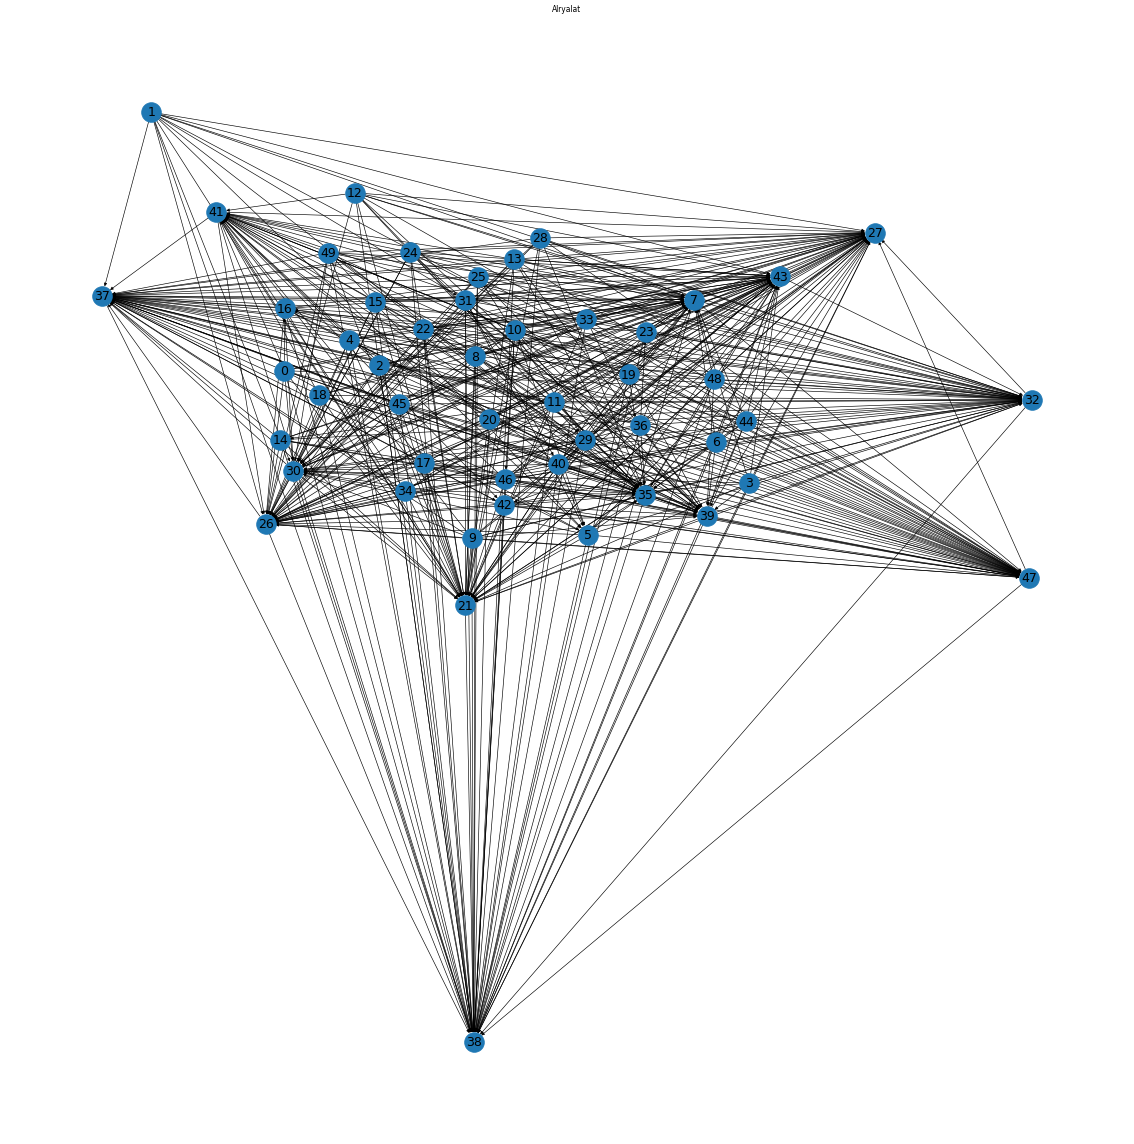

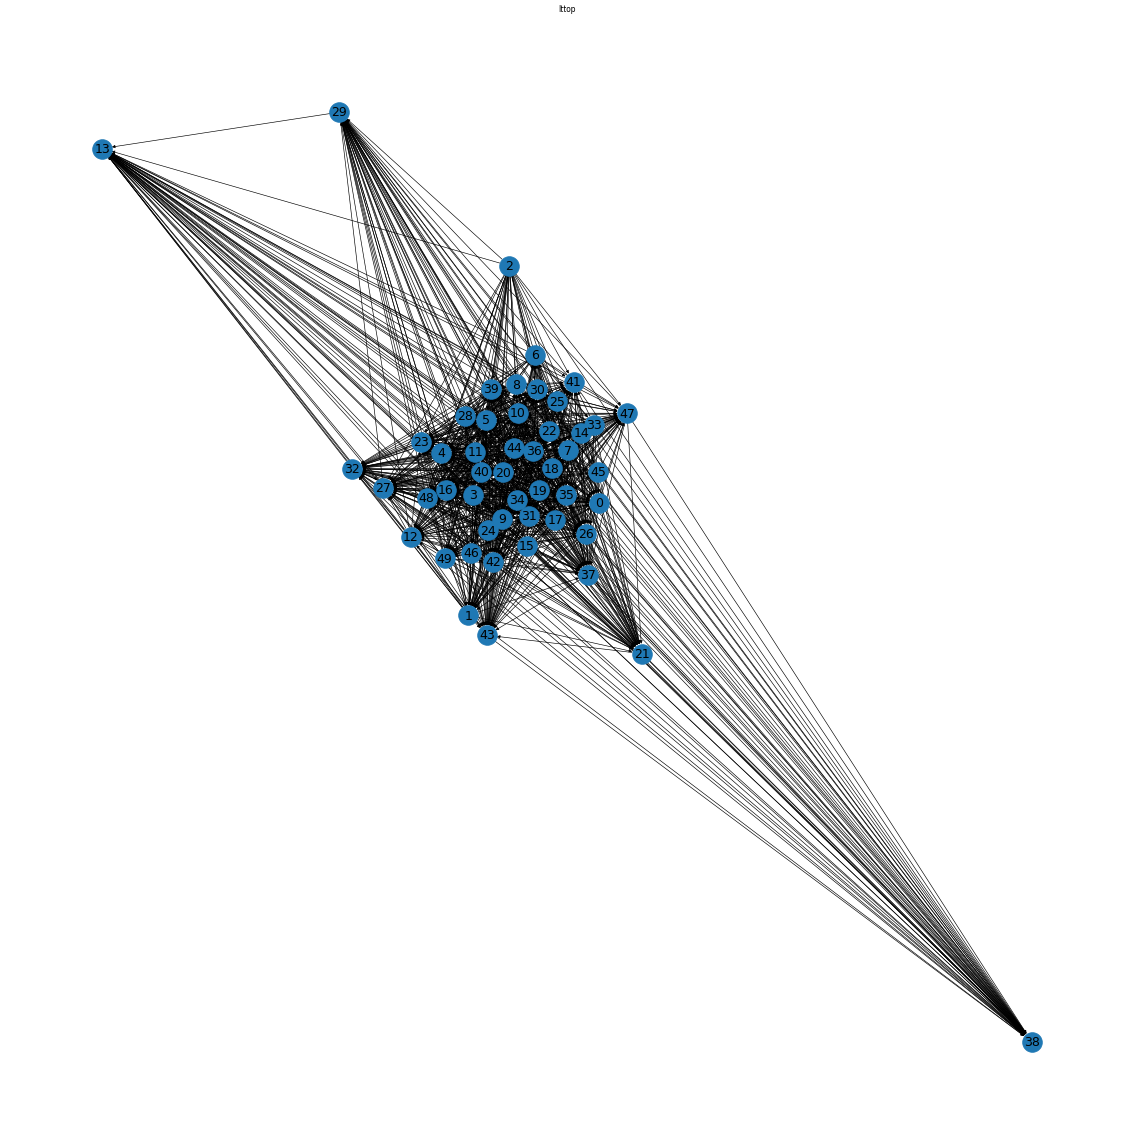

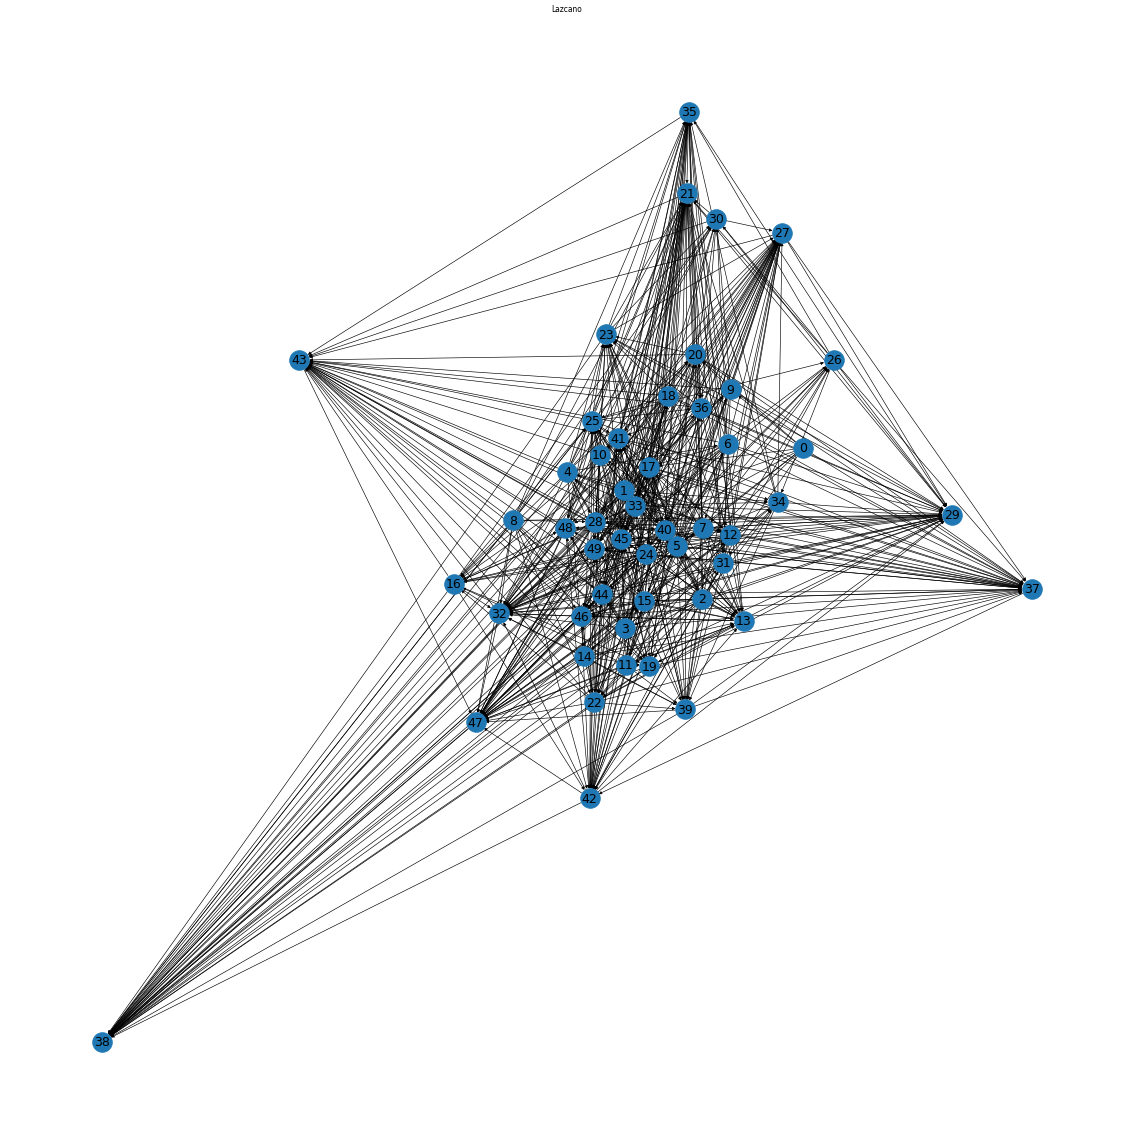

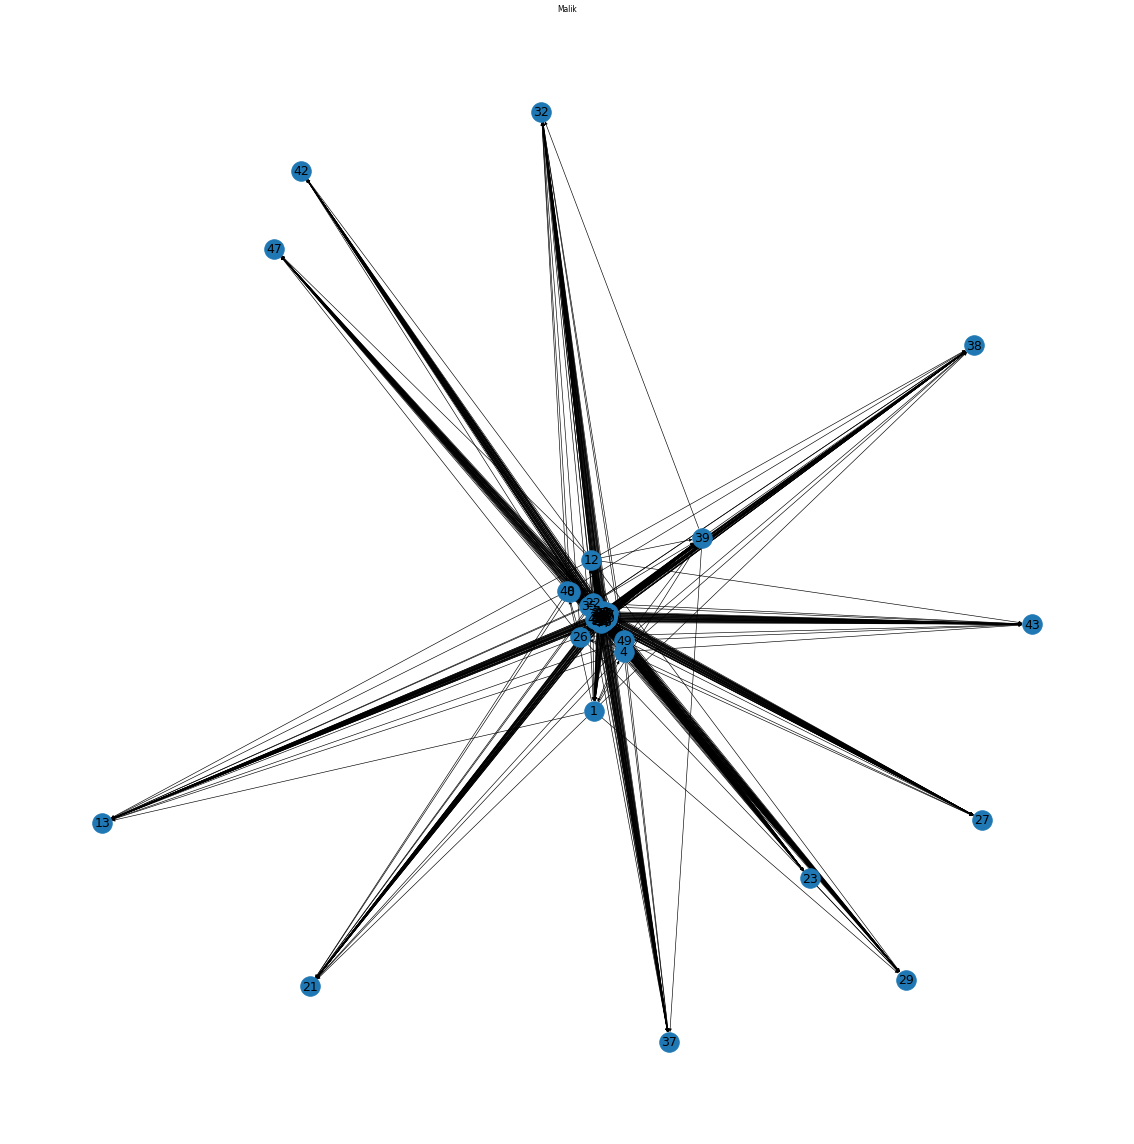

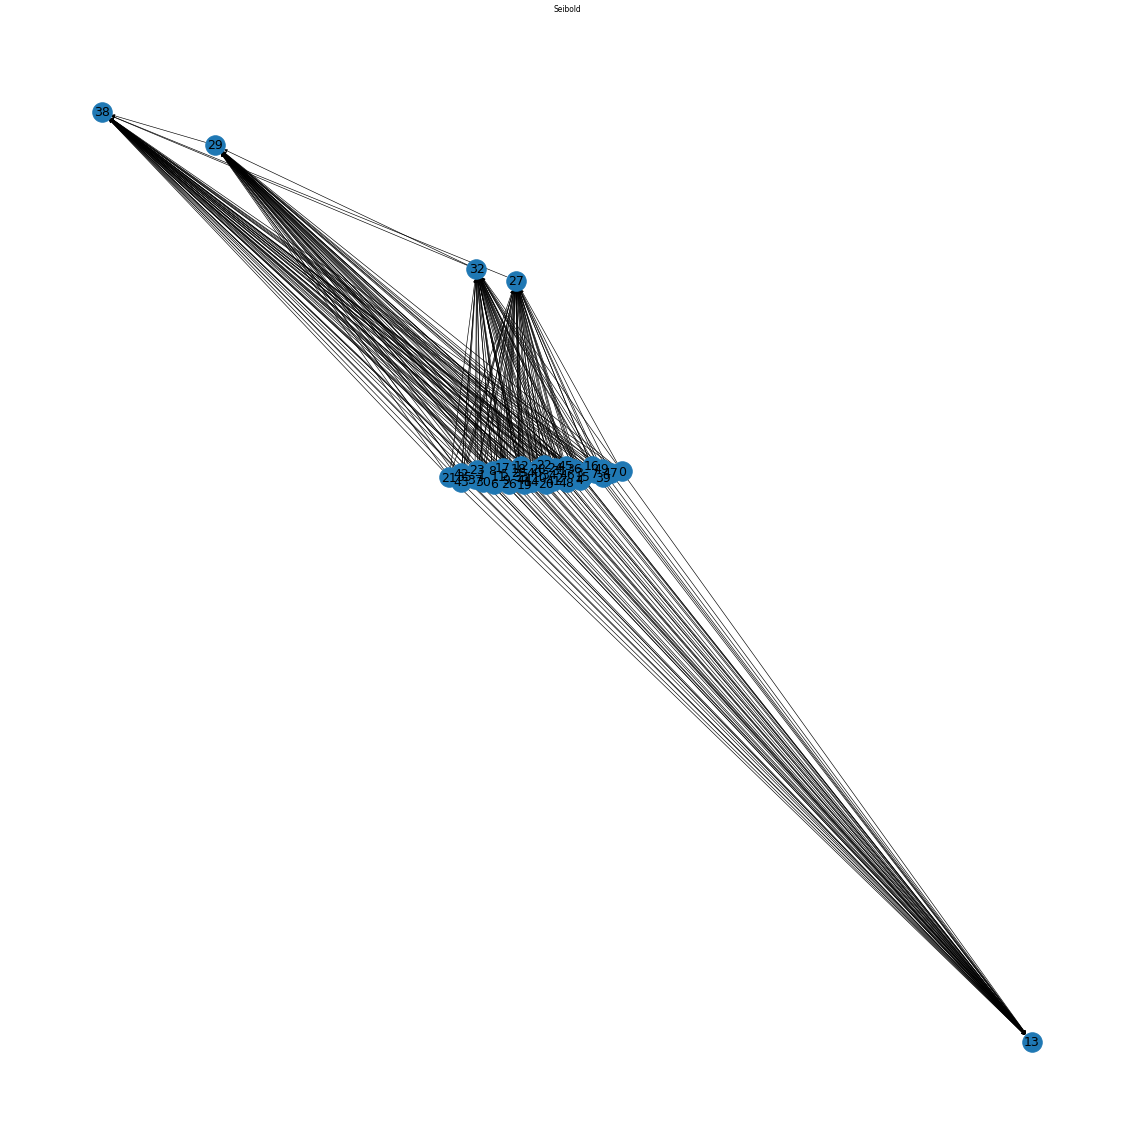

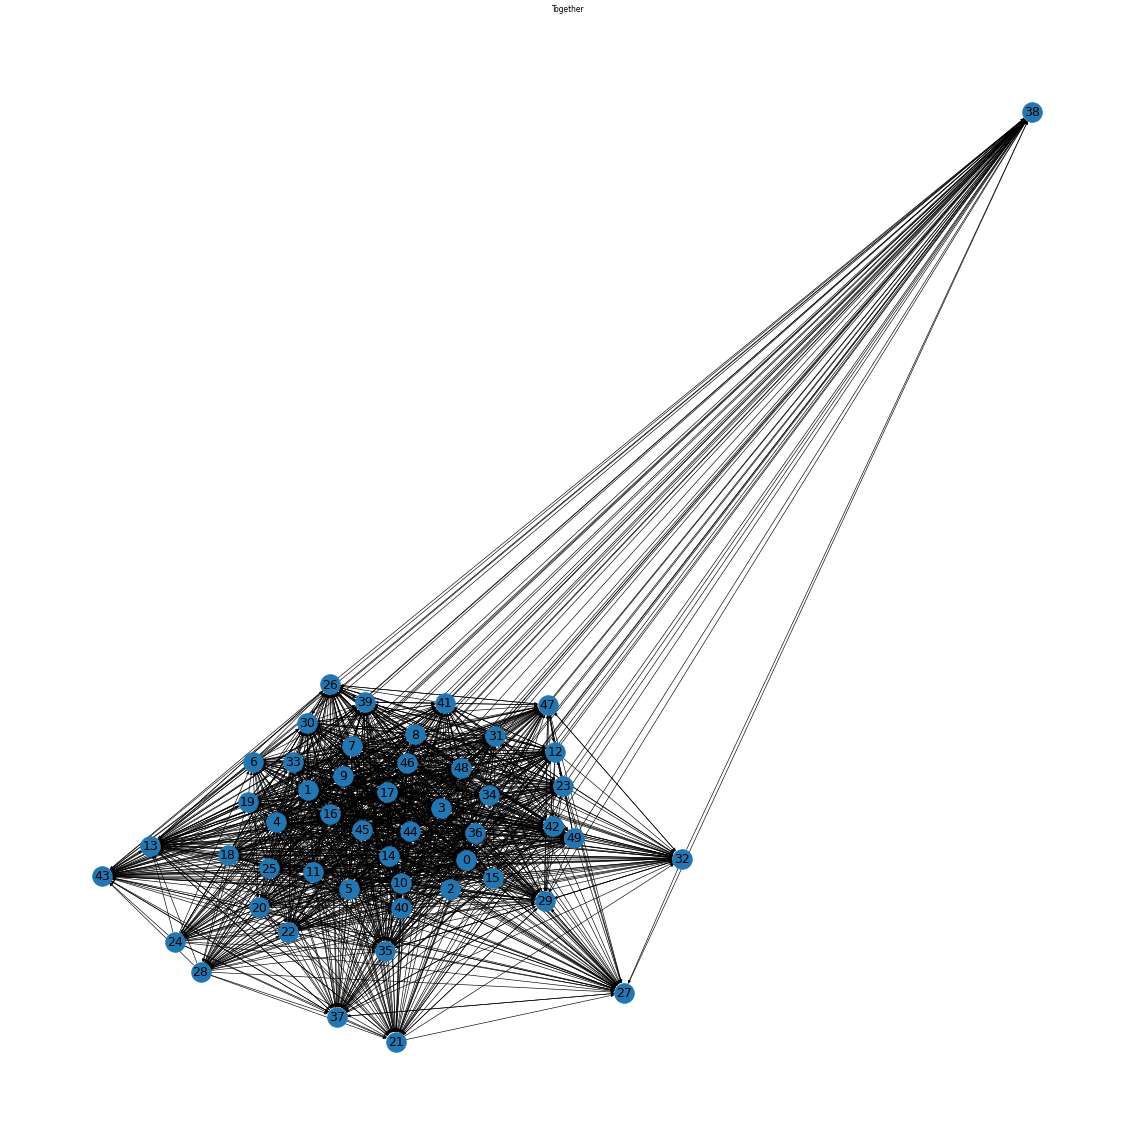

In [9]:
alr_graph = gen_graph_cycles(alr_pairs_rear, 'Alryalat')
itt_graph = gen_graph_cycles(itt_pairs_rear, 'Ittop')
laz_graph = gen_graph_cycles(laz_pairs_rear, 'Lazcano')
mal_graph = gen_graph_cycles(mal_pairs_rear, 'Malik')
sei_graph = gen_graph_cycles(sei_pairs_rear, 'Seibold')
all_graph = gen_graph_cycles(all_pairs_rear, 'Together')

## Cycles

In [10]:
# Cycle functions
# https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.selfloop_edges.html
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cycles.simple_cycles.html
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cycles.find_cycle.html

def cycle_search(graph, name, info_wanted):

    print(f'{name} Graph')

    print(f'Is directed acyclic graph: {nx.is_directed_acyclic_graph(graph)}')

    if info_wanted == 'Topological' or info_wanted == 'All':
        try:
            print(f'Topological Ordering {list(reversed(list(nx.topological_sort(graph))))}')
        except:
            print('This is a cyclic graph, so a topological ordering is not possible.')

    if info_wanted == 'Self' or info_wanted == 'All':
        self_cyc = list(nx.selfloop_edges(graph)) # Node on either end of the edge (a loop)
        print('Self cycles:', self_cyc)

    if info_wanted == 'Simple' or info_wanted == 'All':
        simp_cyc = list(nx.simple_cycles(graph)) # Path to return to any node in the subgraph
        print('Simple cycles', simp_cyc)

    if info_wanted == 'First' or info_wanted == 'All':
        try:
            find_cyc = list(nx.find_cycle(graph, orientation='original')) # Multiple ways to traverse the two nodes
            print('First-depth Traversal Cycles', find_cyc)
        except:
            print('No first-depth traversal cycles found')

    print('\n')

2/24: Note, we are having an issue with Ittoop's graph and the Simple Cycles. It is running until the kernel dies. With lowered pairs, it works, though. So, something is happening as Ittoop's graph grows. Lazcano's ran for over 400 minutes before we stopped it.

In [11]:
# # Simple Cycles
cycle_search(alr_graph, 'Alryalat', 'All')
cycle_search(itt_graph, 'Ittoop', 'Topological')
cycle_search(laz_graph, 'Lazcano', 'Topological')
cycle_search(mal_graph, 'Malik', 'All')
cycle_search(sei_graph, 'Seibold', 'All')
cycle_search(all_graph, 'All Raters', 'Topological')

Alryalat Graph
Is directed acyclic graph: True
Topological Ordering [38, 27, 32, 21, 37, 43, 47, 26, 39, 35, 42, 41, 7, 30, 5, 23, 40, 36, 29, 31, 16, 14, 46, 48, 45, 34, 49, 44, 33, 17, 15, 1, 25, 28, 6, 12, 8, 13, 9, 20, 19, 4, 18, 24, 0, 2, 3, 11, 22, 10]
Self cycles: []
Simple cycles []
No first-depth traversal cycles found


Ittoop Graph
Is directed acyclic graph: False
This is a cyclic graph, so a topological ordering is not possible.


Lazcano Graph
Is directed acyclic graph: False
This is a cyclic graph, so a topological ordering is not possible.


Malik Graph
Is directed acyclic graph: False
This is a cyclic graph, so a topological ordering is not possible.
Self cycles: []
Simple cycles [[1, 4, 16, 48, 11], [1, 4, 16, 48, 11, 5], [1, 4, 16, 48, 11, 5, 30, 49, 35], [1, 4, 16, 48, 11, 5, 30, 49, 41], [1, 4, 16, 48, 11, 5, 30, 49], [1, 4, 16, 48, 11, 5, 30, 49, 14], [1, 4, 16, 48, 11, 5, 30, 49, 14, 7], [1, 4, 16, 48, 11, 5, 30, 49, 14, 7, 22, 35], [1, 4, 16, 48, 11, 5, 30, 49, 1

In [14]:
## Saving a graph

nx.write_edgelist(sei_graph, '/home/clachris/Documents/projects/breaking_cycles_in_noisy_hierarchies-master/data/sei.edges', data=False)

# Network Centrality

We will explore measures of the importance of nodes. Let $v$ denote a node, $d_v$ denote the degree of node $v$, and $|N|$ the number of nodes.

## Degree Centrality:

$$ Centrality_{degree}(v) = \frac{d_v}{(|N|-1)} $$ 

In [13]:
deg_in_centrality_alr = nx.in_degree_centrality(alr_graph)
deg_out_centrality_alr = nx.out_degree_centrality(alr_graph)


## Closeness Centrality:

$$ Centrality_{closeness}(v) = \frac{|R(v)|}{|N|-1} \frac{|R(v)|}{\sum_{u \in R(v)}d(u,v)} $$

In the above, $R(v)$ is the set of all nodes that can reach $v$ and $d(u,v)$ is the distance between $u$ and $v$. 

In [15]:
closeness_centrality_alr = nx.closeness_centrality(alr_graph)

## Betweenness Centrality:

$$ Centrality_{betweenness} (v) = \sum_{s,t \in N} (\sigma_{s,t}(v), \sigma_{s,t}) $$

In the above, $\sigma_{s,t}$ is the number of shortest paths between $s$ and $t$ and $\sigma_{s,t} (v)$ is the number of shortest paths between $s$ and $t$ that pass through $v$. 

In [18]:
bet_centrality_alr = nx.betweenness_centrality(alr_graph, normalized = True, 
                                              endpoints = False)

In [24]:
# Network Centrality Comparison

def centrality_comparison(graph1, graph2):
    '''
    This function takes two graphs with the same nodes and compares their centrality per node.
    '''

    deg_in_centrality_g1 = nx.in_degree_centrality(graph1)
    deg_out_centrality_g1 = nx.out_degree_centrality(graph1)
    closeness_centrality_g1 = nx.closeness_centrality(graph1)
    bet_centrality_g1 = nx.betweenness_centrality(graph1, normalized = True, endpoints = False)

    centralities_g1 = [deg_in_centrality_g1, deg_out_centrality_g1, closeness_centrality_g1, bet_centrality_g1]

    deg_in_centrality_g2 = nx.in_degree_centrality(graph2)
    deg_out_centrality_g2 = nx.out_degree_centrality(graph2)
    closeness_centrality_g2 = nx.closeness_centrality(graph2)
    bet_centrality_g2 = nx.betweenness_centrality(graph2, normalized = True, endpoints = False)

    centralities_g2 = [deg_in_centrality_g2, deg_out_centrality_g2, closeness_centrality_g2, bet_centrality_g2]

    difference_dict_keys = ['deg_in', 'deg_out', 'closeness', 'between']

    difference_dict = {}

    for i in range(len(centralities_g1)):
        m1 = centralities_g1[i]
        m2 = centralities_g2[i]

        m1_keys = list(m1.keys())
        m1_keys.sort()

        dict_key = difference_dict_keys[i]

        total = 0
        for val in m1_keys:
            diff = np.abs(m1.get(val) - m2.get(val))
            total += diff
        total /= len(m1_keys)

        difference_dict[dict_key] = np.round(total, 4)

    return difference_dict

print(f'Here is an example comparing Seibold and Alryalat {centrality_comparison(sei_graph, alr_graph)}')

Here is an example comparing Seibold and Alryalat {'deg_in': 0.1722, 'deg_out': 0.1339, 'closeness': 0.1808, 'between': 0.0034}


## Ranking

In [88]:
# Ranking

def rankings(pair_set, name, printing):
    params = choix.ilsr_pairwise(n_items, pair_set, alpha=0.01)
    ranked_params = np.argsort(params)+1
    if printing:
        print(name, ranked_params)

    return ranked_params

alr_rankings = rankings(alr_pairs_rear, 'Alryalat', True)
itt_rankings = rankings(itt_pairs_rear, 'Ittoop', True)
laz_rankings = rankings(laz_pairs_rear, 'Lazcano', True)
mal_rankings = rankings(mal_pairs_rear, 'Malik', True)
sei_rankings = rankings(sei_pairs_rear, 'Seibold', True)
all_rankings = rankings(all_pairs_rear, 'All', True)

Alryalat [39 28 33 48 22 38 44 27 40 36  8 42 31 43  6 17 30 24 15 47 41  7 46 19
 21 29  4 16 20 49 37 10  3 35  5 25 14 45 32  9 50 23 26 13 12 18  1 34
 11  2]
Ittoop [39 28 14 33 44 38 30 22 27 24 48 13 17  2 43  5 49 40 36 42  1 50  6 32
 31 18 29 11 23  9  8 10 47  7 46 15 34  4 12 16 19 45 26 21 20 25 41 35
 37  3]
Lazcano [39 44 30 33 48 28 38 22 43 36 47 24 42 50 14 40 49 46 45 31 35 27 41 34
 37 32 20 17 26 21 23 25 29 16 13 18 19 10 11  8 12 15  7  9  6  5  4  2
  1  3]
Malik [33 30 39 48 38 22 14 28 44 43 24 40  1 13 27 49 36 31  2  5 17 42  6 23
  8 12 15 18 11 50 47 32  7 29  9 46 19 20 21 26 10 41 45 34 16  4 25 37
  3 35]
Seibold [39 30 14 28 33 44 22  1 24 38 43 48 50 17 40 36  2 13 27 31  9 42  8  6
 18 23  7 32 47 29 49  5 46 34 12 15 11 10 16 20  4 21 45 25 41 37 26 35
  3 19]
All [39 28 33 44 38 22 30 48 14 43 24 27 40 36 13 17 42 31  1 49 50  2  8  5
  6 47 32 29 23 46 18  9 11 15 34 45  7 41 10 12 21 20 26 16 35 37 19  4
 25  3]


## Ranking Comparison

Kendall's Tau https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.kendalltau.html

Note, this *does not* weigh based on the ranking. As in, we might want the best and worst to be the most important, but this doesn't weight anything. 

In [140]:
# Ranking function

def kendall_ranking(rankings1, ranking2):
    tau, _ = stats.kendalltau(rankings1, ranking2)

    return tau


alr_kendall_tau = [kendall_ranking(alr_rankings, alr_rankings), kendall_ranking(alr_rankings, itt_rankings), kendall_ranking(alr_rankings, laz_rankings),
                   kendall_ranking(alr_rankings, mal_rankings), kendall_ranking(alr_rankings, sei_rankings), kendall_ranking(alr_rankings, all_rankings)]

itt_kendall_tau = [kendall_ranking(itt_rankings, alr_rankings), kendall_ranking(itt_rankings, itt_rankings), kendall_ranking(itt_rankings, laz_rankings),
                   kendall_ranking(itt_rankings, mal_rankings), kendall_ranking(itt_rankings, sei_rankings), kendall_ranking(itt_rankings, all_rankings)]

laz_kendall_tau = [kendall_ranking(laz_rankings, itt_rankings), kendall_ranking(laz_rankings, itt_rankings), kendall_ranking(laz_rankings, laz_rankings),
                   kendall_ranking(laz_rankings, mal_rankings), kendall_ranking(laz_rankings, sei_rankings), kendall_ranking(laz_rankings, all_rankings)]

mal_kendall_tau = [kendall_ranking(mal_rankings, itt_rankings), kendall_ranking(mal_rankings, itt_rankings), kendall_ranking(mal_rankings, laz_rankings),
                   kendall_ranking(mal_rankings, mal_rankings), kendall_ranking(mal_rankings, sei_rankings), kendall_ranking(mal_rankings, all_rankings)]

sei_kendall_tau = [kendall_ranking(sei_rankings, itt_rankings), kendall_ranking(sei_rankings, itt_rankings), kendall_ranking(sei_rankings, laz_rankings),
                   kendall_ranking(sei_rankings, mal_rankings), kendall_ranking(sei_rankings, sei_rankings), kendall_ranking(sei_rankings, all_rankings)]

all_kendall_tau = [kendall_ranking(all_rankings, itt_rankings), kendall_ranking(all_rankings, itt_rankings), kendall_ranking(all_rankings, laz_rankings),
                   kendall_ranking(all_rankings, mal_rankings), kendall_ranking(all_rankings, sei_rankings), kendall_ranking(all_rankings, all_rankings)]

In [141]:
# Creating the Kendall's Tau dataframe

kendall_dict = {'Alryalat':alr_kendall_tau, 'Ittoop': itt_kendall_tau, 'Lazcano': laz_kendall_tau, 
              'Malik': mal_kendall_tau, 'Seibold': sei_kendall_tau, 'All': all_kendall_tau}
kendall_df = pd.DataFrame(kendall_dict, index = ['Alryalat', 'Ittoop', 'Lazcano', 'Malik', 'Seibold', 'All'])
kendall_df

Alryalat    Ittoop   Lazcano     Malik   Seibold       All
Alryalat  1.000000 -0.237551  0.098776 -0.046531  0.085714 -0.061224
Ittoop   -0.237551  1.000000  0.098776 -0.046531  0.085714 -0.061224
Lazcano   0.200000  0.098776  1.000000 -0.000816  0.013878  0.118367
Malik     0.093878 -0.046531 -0.000816  1.000000  0.113469  0.015510
Seibold  -0.018776  0.085714  0.013878  0.113469  1.000000 -0.035102
All       0.294694 -0.061224  0.118367  0.015510 -0.035102  1.000000

Spearman's $\rho$: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

In [139]:
# Ranking function

def spearmans_rho(rankings1, ranking2):
    rho, _ = stats.spearmanr(rankings1, ranking2)

    return rho


alr_spearmansr = [spearmans_rho(alr_rankings, alr_rankings), spearmans_rho(alr_rankings, itt_rankings), spearmans_rho(alr_rankings, laz_rankings),
                   spearmans_rho(alr_rankings, mal_rankings), spearmans_rho(alr_rankings, sei_rankings), spearmans_rho(alr_rankings, all_rankings)]

itt_spearmansr = [spearmans_rho(itt_rankings, alr_rankings), spearmans_rho(itt_rankings, itt_rankings), spearmans_rho(itt_rankings, laz_rankings),
                   spearmans_rho(itt_rankings, mal_rankings), spearmans_rho(itt_rankings, sei_rankings), spearmans_rho(itt_rankings, all_rankings)]

laz_spearmansr = [spearmans_rho(laz_rankings, itt_rankings), spearmans_rho(laz_rankings, itt_rankings), spearmans_rho(laz_rankings, laz_rankings),
                   spearmans_rho(laz_rankings, mal_rankings), spearmans_rho(laz_rankings, sei_rankings), spearmans_rho(laz_rankings, all_rankings)]

mal_spearmansr = [spearmans_rho(mal_rankings, itt_rankings), spearmans_rho(mal_rankings, itt_rankings), spearmans_rho(mal_rankings, laz_rankings),
                   spearmans_rho(mal_rankings, mal_rankings), spearmans_rho(mal_rankings, sei_rankings), spearmans_rho(mal_rankings, all_rankings)]

sei_spearmansr = [spearmans_rho(sei_rankings, itt_rankings), spearmans_rho(sei_rankings, itt_rankings), spearmans_rho(sei_rankings, laz_rankings),
                   spearmans_rho(sei_rankings, mal_rankings), spearmans_rho(sei_rankings, sei_rankings), spearmans_rho(sei_rankings, all_rankings)]

all_spearmansr = [spearmans_rho(all_rankings, itt_rankings), spearmans_rho(all_rankings, itt_rankings), spearmans_rho(all_rankings, laz_rankings),
                   spearmans_rho(all_rankings, mal_rankings), spearmans_rho(all_rankings, sei_rankings), spearmans_rho(all_rankings, all_rankings)]

In [142]:
# Creating the Kendall's Tau dataframe

spearmansr_dict = {'Alryalat':alr_spearmansr, 'Ittoop': itt_spearmansr, 'Lazcano': laz_spearmansr, 
              'Malik': mal_spearmansr, 'Seibold': sei_spearmansr, 'All': all_spearmansr}
spearmansr_df = pd.DataFrame(spearmansr_dict, index = ['Alryalat', 'Ittoop', 'Lazcano', 'Malik', 'Seibold', 'All'])
spearmansr_df

Alryalat    Ittoop   Lazcano     Malik   Seibold       All
Alryalat  1.000000 -0.343962  0.138247 -0.076303  0.132677 -0.091285
Ittoop   -0.343962  1.000000  0.138247 -0.076303  0.132677 -0.091285
Lazcano   0.305642  0.138247  1.000000  0.005330  0.039232  0.187227
Malik     0.135270 -0.076303  0.005330  1.000000  0.169748  0.024442
Seibold  -0.025114  0.132677  0.039232  0.169748  1.000000 -0.049124
All       0.423577 -0.091285  0.187227  0.024442 -0.049124  1.000000

### MC Ranking Convergence

In [143]:
# MC Function

def MC_rankings_kendall_tau(full_pair_set, full_rankings, times_to_run, percentage_list):
    rankings_arr = []
    for i in range(0, times_to_run):
        ranking_sim_metric = []
        pair_set_shuff = full_pair_set.copy() # We don't want to alter the original list
        np.random.shuffle(pair_set_shuff) # Shuffling the list
        for pct in percentage_list:
            rankings_pct = rankings(pair_set_shuff[:int(np.floor(pct*len(full_pair_set)))], '', False)
            k_tau = kendall_ranking(full_rankings, rankings_pct)
            ranking_sim_metric.append(k_tau)
        rankings_arr.append(ranking_sim_metric)
    df_rankings = pd.DataFrame(rankings_arr) # Creating a dataframe where each row is an MC run and each column is a percentage
    means = list(df_rankings.mean(axis = 0)) # Getting the mean along the columns

    return means

def MC_spearmansr(full_pair_set, full_rankings, times_to_run, percentage_list):
    rankings_arr = []
    for i in range(0, times_to_run):
        ranking_sim_metric = []
        pair_set_shuff = full_pair_set.copy() # We don't want to alter the original list
        np.random.shuffle(pair_set_shuff) # Shuffling the list
        for pct in percentage_list:
            rankings_pct = rankings(pair_set_shuff[:int(np.floor(pct*len(full_pair_set)))], '', False)
            k_tau = spearmans_rho(full_rankings, rankings_pct)
            ranking_sim_metric.append(k_tau)
        rankings_arr.append(ranking_sim_metric)
    df_rankings = pd.DataFrame(rankings_arr) # Creating a dataframe where each row is an MC run and each column is a percentage
    means = list(df_rankings.mean(axis = 0)) # Getting the mean along the columns

    return means

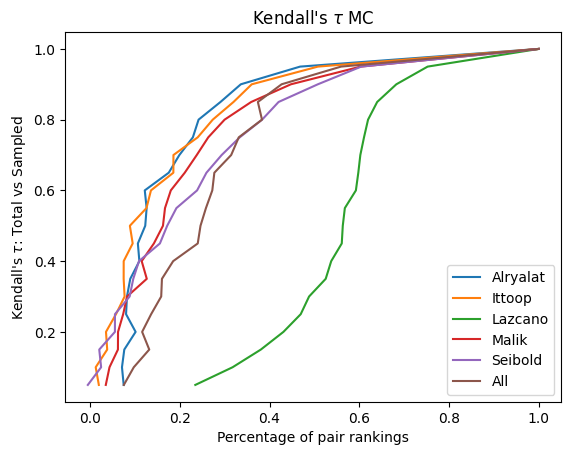

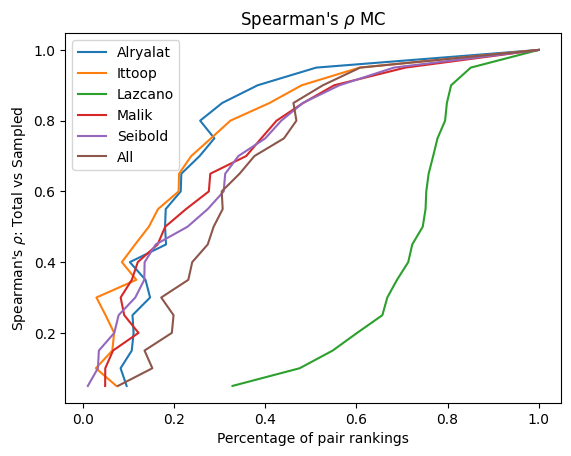

In [147]:
# MC for all

pairs_list = [alr_pairs_rear, itt_pairs_rear, laz_pairs_rear, mal_pairs_rear, sei_pairs_rear, all_pairs_rear]
rankins_list = [alr_rankings, itt_rankings, laz_rankings, mal_rankings, sei_rankings, all_rankings]
names = ['Alryalat', 'Ittoop', 'Lazcano', 'Malik', 'Seibold', 'All']
percentages = np.linspace(0.05, 1, 20)

## Kendall's Tau
for i in range(len(pairs_list)):
    means = MC_rankings_kendall_tau(pairs_list[i], rankins_list[i], 50, percentages)
    plt.plot(means, percentages, label = names[i])
    plt.title(r"Kendall's $\tau$ MC")
    plt.xlabel('Percentage of pair rankings')
    plt.ylabel(r"Kendall's $\tau$: Total vs Sampled")
plt.legend()
plt.show()

## Spearman's Rho
for i in range(len(pairs_list)):
    means = MC_spearmansr(pairs_list[i], rankins_list[i], 50, percentages)
    plt.plot(means, percentages, label = names[i])
    plt.title(r"Spearman's $\rho$ MC")
    plt.xlabel('Percentage of pair rankings')
    plt.ylabel(r"Spearman's $\rho$: Total vs Sampled")
plt.legend()

Regression on the ranks.

# Breaking Cycles

## Testing

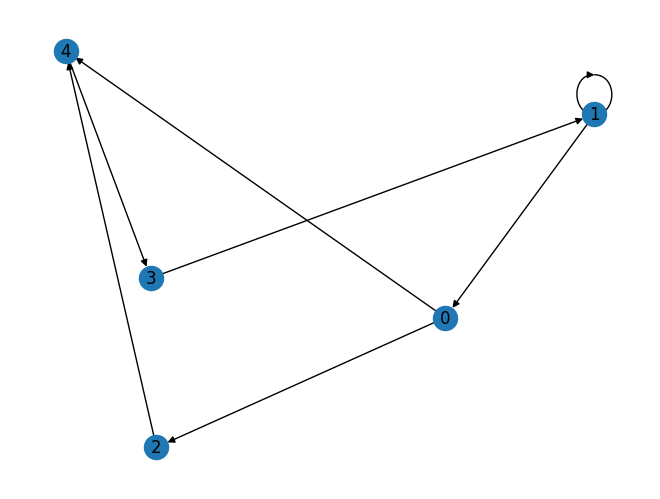

Simple cycles [[1], [0, 2, 4, 3, 1], [0, 4, 3, 1]]


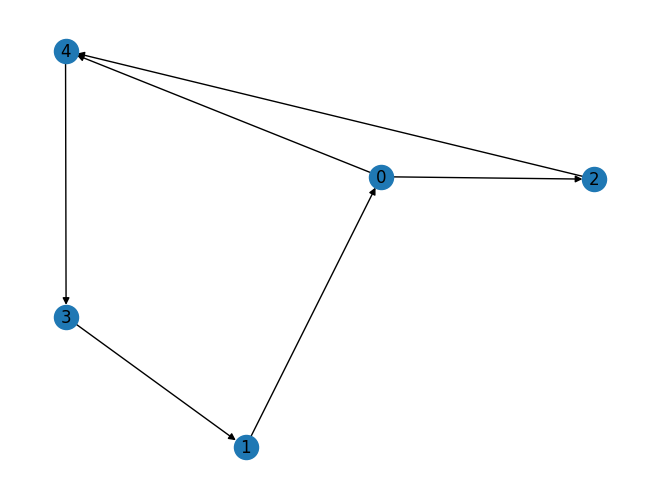

Self cycles: []


In [72]:
n_items = 5 # Note, this is the number of "players", NOT the number of "games"
data = [
    (1, 0), (0, 4), (3, 1),
    (0, 2), (2, 4), (4, 3),
    (1,1)
] # Game outcome

graph = nx.DiGraph() # Creates a graph
graph.add_edges_from(data) # Creates edges and nodes from the data
nx.draw(graph, with_labels=True)
plt.show()

simp_cyc = list(nx.simple_cycles(graph)) # Path to return to any node in the subgraph
print('Simple cycles', simp_cyc)

graph.remove_edges_from(nx.selfloop_edges(graph))
nx.draw(graph, with_labels=True)
plt.show()
self_cyc = list(nx.selfloop_edges(graph)) # Node on either end of the edge (a loop)
print('Self cycles:', self_cyc)

Note, neither Seibold nor Alryalat have any self cycles, so we have not yet tried this on real data.

To do:

1. Figure out how to best break simple cycles.
2. Play with different ranking schemas.
3. See how fast subsets converge to the overall rankings.


## Chris Custom

In [20]:
sei_graph2 = sei_graph.copy()
mal_graph2 = mal_graph.copy()

In [16]:
def custom_remove_cycles(graph):
    cycles_present = True
    cycles_removed = list()
    while cycles_present:
        try:
        # Getting the cycles and reordering them by most central
            cycles = nx.find_cycle(graph) # Cycles
            print(f'Cycles in this iteration {cycles}')
            edge_betweenness = nx.edge_betweenness_centrality(graph) # Centrality of all edges
            centrality_of_cycle_edges = list()
            for edge, centrality in edge_betweenness.items(): # Getting only the edges which form cycles and their centrality measure
                if edge in cycles:
                    centrality_of_cycle_edges.append((edge, centrality))

            centrality_of_cycle_edges.sort(key = lambda x: x[1], reverse=True) # Sorting the cycle edges by centrality, largest to smallest
            edge_to_remove = centrality_of_cycle_edges[0][0]
            cycles_removed.append(edge_to_remove)
            graph.remove_edge(edge_to_remove[0], edge_to_remove[1])
        except:
            cycles_present = False
            print(f'There are no more cycles. We removed these: {cycles_removed}')

custom_remove_cycles(mal_graph2)

Cycles in this iteration [(22, 5), (5, 30), (30, 49), (49, 7), (7, 22)]
Cycles in this iteration [(41, 16), (16, 35), (35, 1), (1, 22), (22, 5), (5, 30), (30, 4), (4, 41)]
Cycles in this iteration [(1, 22), (22, 5), (5, 1)]
Cycles in this iteration [(16, 35), (35, 1), (1, 16)]
Cycles in this iteration [(1, 48), (48, 11), (11, 49), (49, 7), (7, 22), (22, 5), (5, 1)]
Cycles in this iteration [(41, 16), (16, 35), (35, 1), (1, 4), (4, 41)]
Cycles in this iteration [(41, 16), (16, 14), (14, 41)]
There are no more cycles. We removed these: [(30, 49), (30, 4), (1, 22), (1, 16), (48, 11), (1, 4), (16, 14)]


## From Breaking Cycles in Noisy Heirarchies

https://github.com/zhenv5/breaking_cycles_in_noisy_hierarchies

### DFS

In [34]:
# DFS

## DFS Functions

def dfs_visit_recursively(g,node,nodes_color,edges_to_be_removed):

	nodes_color[node] = 1
	nodes_order = list(g.successors(node))
	nodes_order = np.random.permutation(nodes_order)
	for child in nodes_order:
		if nodes_color[child] == 0:
				dfs_visit_recursively(g,child,nodes_color,edges_to_be_removed)
		elif nodes_color[child] == 1:
			edges_to_be_removed.append((node,child))

	nodes_color[node] = 2

def dfs_remove_back_edges(graph,nodetype = int):
	'''
	0: white, not visited 
	1: grey, being visited
	2: black, already visited
	'''

	g = graph
	nodes_color = {}
	edges_to_be_removed = []
	for node in g.nodes():
		nodes_color[node] = 0

	nodes_order = list(g.nodes())
	nodes_order = np.random.permutation(nodes_order)
	num_dfs = 0
	for node in nodes_order:

		if nodes_color[node] == 0:
			num_dfs += 1
			dfs_visit_recursively(g,node,nodes_color,edges_to_be_removed)

	return edges_to_be_removed

def dfs_performance(graph_file):
	edges_to_be_removed = dfs_remove_back_edges(graph_file)
	
	return edges_to_be_removed

## Getting edges to remove

dfs_edges_to_remove = dfs_performance(sei_graph2)
print(f'The edges DFS found to remove are {dfs_edges_to_remove}')

## Removing the edges and comparing

sei_graph3 = sei_graph2.copy()

sei_graph3.remove_edges_from(dfs_edges_to_remove)
try:
	cycles = nx.find_cycle(sei_graph3) # Cycles
except:
	print(f'There are no cycles in sei_graph3')

print(f'Centrality Comparison for DFS for Seibold {centrality_comparison(sei_graph2, sei_graph3)}')

The edges DFS found to remove are [(12, 1), (30, 8), (6, 1)]
There are no cycles in sei_graph3
Centrality Comparison for DFS for Seibold {'deg_in': 0.0012, 'deg_out': 0.0012, 'closeness': 0.0062, 'between': 0.0008}


### Hierarchy

In [ ]:
# Hierarchy

def get_edges_voting_scores(set_edges_list):
	total_edges = set()
	for edges in set_edges_list:
		total_edges = total_edges | edges
	edges_score = {}
	for e in total_edges:
		edges_score[e] = len(list(filter(lambda x: e in x, set_edges_list)))
	return edges_score


def remove_cycle_edges_strategies(graph,nodes_score_dict,score_name = "socialagony", nodetype = int):


	g = graph
	# greedy
	e1 = scc_based_to_remove_cycle_edges_iterately(g,nodes_score_dict)
	g = graph
	# forward
	e2 = remove_cycle_edges_BF_iterately(g,nodes_score_dict,is_Forward = True,score_name = score_name)
	# backward
	g = graph
	e3 = remove_cycle_edges_BF_iterately(g,nodes_score_dict,is_Forward = False,score_name = score_name)
	return e1,e2,e3

def remove_cycle_edges_by_voting(graph,set_edges_list,nodetype = int):
	edges_score = get_edges_voting_scores(set_edges_list)
	e = remove_cycle_edges_heuristic(graph,edges_score,nodetype = nodetype)
	return e 

def remove_cycle_edges_by_hierarchy(graph,nodes_score_dict,score_name = "socialagony",nodetype = int):
	e1,e2,e3 = remove_cycle_edges_strategies(graph,nodes_score_dict,score_name = score_name,nodetype = nodetype)
	e4 = remove_cycle_edges_by_voting(graph,[set(e1),set(e2),set(e3)],nodetype = nodetype)
	return e1,e2,e3,e4

def computing_hierarchy(graph,players_score_func_name, nodetype = int):
	import os.path
	if players_score_func_name == "socialagony":
		from cycle_breaking.helper_funs import dir_tail_name
		dir_name,tail = dir_tail_name(graph)
		agony_file = os.path.join(dir_name,tail.split(".")[0] + "_socialagony.txt")
		#agony_file = graph_file[:len(graph_file)-6] + "_socialagony.txt"
		#from compute_social_agony import compute_social_agony
		#players = compute_social_agony(graph_file,agony_path = "agony/agony ")		
		if False:
		#if os.path.isfile(agony_file):
			print("load pre-computed socialagony from: %s" % agony_file)
			players = read_dict_from_file(agony_file)
		else:
			print("start computing socialagony...")
			from cycle_breaking.compute_social_agony import compute_social_agony
			players = compute_social_agony(graph_file,agony_path = "agony/agony ")
			print("write socialagony to file: %s" % agony_file)
		return players
	g = graph
	if players_score_func_name == "pagerank":
		#print("computing pagerank...")
		players = nx.pagerank(g, alpha = 0.85)
		return players
	elif players_score_func_name == "trueskill":
		output_file = graph_file[:len(graph_file)-6] + "_trueskill.txt"
		output_file_2 = graph_file[:len(graph_file)-6] + "_trueskill.pkl"
		#from true_skill import graphbased_trueskill
		#players = graphbased_trueskill(g)
		#from file_io import write_dict_to_file
		#write_dict_to_file(players,output_file)
		
		'''
		if os.path.isfile(output_file):
			print("load pre-computed trueskill from: %s" % output_file)
			players = read_dict_from_file(output_file,key_type = int, value_type = float)
		elif os.path.isfile(output_file_2):
			print("load pre-computed trueskill from: %s" % output_file_2)
			players = read_from_pickle(output_file_2)			
		'''
		if True:
			print("start computing trueskill...")
			from cycle_breaking.true_skill import graphbased_trueskill
			players = graphbased_trueskill(g)
			from cycle_breaking.file_io import write_dict_to_file
			print("write trueskill to file: %s" % output_file)
			write_dict_to_file(players,output_file)
		
		return players

def breaking_cycles_by_hierarchy_performance(graph,gt_file,players_score_name,nodetype = int):

	if players_score_name != "ensembling":
		players_score_dict  = computing_hierarchy(graph,players_score_name,nodetype = nodetype)
		e1,e2,e3,e4 = remove_cycle_edges_by_hierarchy(graph,players_score_dict,players_score_name,nodetype = nodetype)
		
		if players_score_name == "pagerank":
			report_performance(gt_file,e1,"PR")
			return

		if players_score_name == "socialagony":
			note = "SA_"
		elif players_score_name == "trueskill":
			note = "TS_"

		report_performance(gt_file,e1, note+"G")
		report_performance(gt_file,e2, note+"F")
		report_performance(gt_file,e3, note+"B")
		report_performance(gt_file,e4, note+"Voting")
	else:
		players_score_dict  = computing_hierarchy(graph_file,"socialagony",nodetype = nodetype)
		e1,e2,e3,e4 = remove_cycle_edges_by_hierarchy(graph_file,players_score_dict,"socialagony",nodetype = nodetype)
		report_performance(gt_file,e1,  "SA_G")
		write_pairs_to_file(e1,graph_file[:len(graph_file)-6] + "_removed_by_SA-G.edges")
		report_performance(gt_file,e2,  "SA_F")
		write_pairs_to_file(e2,graph_file[:len(graph_file)-6] + "_removed_by_SA-F.edges")
		report_performance(gt_file,e3,  "SA_B")
		write_pairs_to_file(e3,graph_file[:len(graph_file)-6] + "_removed_by_SA-B.edges")
		report_performance(gt_file,e4,  "SA_Voting")
		write_pairs_to_file(e4,graph_file[:len(graph_file)-6] + "_removed_by_SA-Voting.edges")

		players_score_dict  = computing_hierarchy(graph_file,"trueskill",nodetype = nodetype)
		e5,e6,e7,e8 = remove_cycle_edges_by_hierarchy(graph_file,players_score_dict,"trueskill",nodetype = nodetype)
		report_performance(gt_file,e5,  "TS_G")
		write_pairs_to_file(e5,graph_file[:len(graph_file)-6] + "_removed_by_TS-G.edges")
		report_performance(gt_file,e6,  "TS_F")
		write_pairs_to_file(e6,graph_file[:len(graph_file)-6] + "_removed_by_TS-F.edges")
		report_performance(gt_file,e7,  "TS_B")
		write_pairs_to_file(e7,graph_file[:len(graph_file)-6] + "_removed_by_TS-B.edges")
		report_performance(gt_file,e8,  "TS_Voting")
		write_pairs_to_file(e7,graph_file[:len(graph_file)-6] + "_removed_by_TS-Voting.edges")

		e9 = remove_cycle_edges_by_voting(graph_file,[set(e1),set(e2),set(e3),set(e5),set(e6),set(e7)],nodetype = nodetype)
		report_performance(gt_file,e9,"H_Voting")
		write_pairs_to_file(e9,graph_file[:len(graph_file)-6] + "_removed_by_H-Voting.edges")



import argparse
if __name__ == "__main__":
	parser = argparse.ArgumentParser()
	parser.add_argument("-g","--graph_file",default= " ", help = "input graph file name (edges list)")
	parser.add_argument("-s","--score_name",default = "pagerank",help = "nodes score function: trueskill, socialagony, ensembling, pagerank...")
	parser.add_argument("-t","--gt_edges_file",default = None, help = "ground truth edges file")
	
	args = parser.parse_args()
	graph_file = args.graph_file
	players_score_name = args.score_name
	gt_file = args.gt_edges_file

	breaking_cycles_by_hierarchy_performance(graph_file,gt_file,players_score_name)
	
## Removing the edges and comparing

sei_graph3 = sei_graph2.copy()

sei_graph3.remove_edges_from(dfs_edges_to_remove)
try:
	cycles = nx.find_cycle(sei_graph3) # Cycles
except:
	print(f'There are no cycles in sei_graph3')

print(f'Centrality Comparison for DFS for Seibold {centrality_comparison(sei_graph2, sei_graph3)}')
	
